# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
pd.set_option('display.max_columns', None)

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [79]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [111]:
sinasc_loc = sinasc_raw[['munResNome', 'munResLat', 'munResLon', 'munResAlt']]
mapping = pd.cut(sinasc_loc['munResLat'], [-20, -10.5, 0])
sinasc_loc.groupby(mapping)[['munResLon', 'munResAlt']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


C:\Users\enzob\AppData\Local\Temp\ipykernel_1588\1153176252.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_loc.groupby(mapping)[['munResLon', 'munResAlt']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


munResLon                                           \
                         sum       mean       min       max    median   
munResLat                                                               
(-20.0, -10.5] -804257.01023 -61.899254 -65.32395 -60.13858 -61.90944   
(-10.5, 0.0]   -891822.01897 -63.547244 -65.32915 -61.99959 -63.83145   

                                    munResAlt                            \
                     std       var        sum        mean    min    max   
munResLat                                                                 
(-20.0, -10.5]  1.231482  1.516548  3310445.0  254.786808  133.0  595.0   
(-10.5, 0.0]    0.627696  0.394002  1530415.0  109.050520   85.0  192.0   

                                                 
               median         std           var  
munResLat                                        
(-20.0, -10.5]  191.0  139.771518  19536.077237  
(-10.5, 0.0]     87.0   30.071422    904.290400

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [107]:
sinasc_area = sinasc_raw[['munResArea', 'ESTCIVMAE', 'CONSULTAS']]
mapping = pd.cut(sinasc_area['munResArea'], [0, 7000, 34000])
result = sinasc_area.groupby(mapping)[['ESTCIVMAE', 'CONSULTAS']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
result


C:\Users\enzob\AppData\Local\Temp\ipykernel_1588\3205515494.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_area.groupby(mapping)[['ESTCIVMAE', 'CONSULTAS']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


ESTCIVMAE                                                 \
                    sum      mean  min  max median       std       var   
munResArea                                                               
(0, 7000]       38062.0  2.699433  1.0  9.0    2.0  1.660705  2.757940   
(7000, 34000]    8774.0  2.040465  1.0  9.0    2.0  1.450506  2.103968   

              CONSULTAS                                               
                    sum      mean min max median       std       var  
munResArea                                                            
(0, 7000]         53015  3.716699   1   9    4.0  0.612690  0.375390  
(7000, 34000]     15525  3.588766   1   9    4.0  0.763838  0.583448

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [113]:
sinasc_alt = sinasc_raw[['munResAlt', 'HORANASC', 'DIFDATA']]
mapping = pd.qcut(sinasc_alt['munResAlt'], 4)
result = sinasc_alt.groupby(mapping)[['HORANASC', 'DIFDATA']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
result

C:\Users\enzob\AppData\Local\Temp\ipykernel_1588\3190425863.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_alt.groupby(mapping)[['HORANASC', 'DIFDATA']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


HORANASC                                                \
                       sum         mean  min     max  median         std   
munResAlt                                                                  
(84.999, 87.0]  11362450.0  1295.456618  0.0  2359.0  1320.0  626.139522   
(87.0, 153.0]    5923984.0  1222.448205  0.0  2359.0  1138.0  573.309422   
(153.0, 191.0]   8735775.0  1260.573593  0.0  2358.0  1225.0  553.640392   
(191.0, 595.0]   8206295.0  1270.520978  0.0  2358.0  1220.0  521.171134   

                              DIFDATA                                        \
                          var     sum       mean min  max median        std   
munResAlt                                                                     
(84.999, 87.0]  392050.701282  243135  27.710850   1  488   23.0  24.609573   
(87.0, 153.0]   328683.693808  159191  32.836427   1  652   31.0  22.751858   
(153.0, 191.0]  306517.683211  223485  32.211732   1  626   28.0  26.563314   
(191.0, 595.0]  271619.351178  243521  37.655946   1  609   33.0  26.182192   

                            
                       var  
munResAlt                   
(84.999, 87.0]  605.631076  
(87.0, 153.0]   517.647057  
(153.0, 191.0]  705.609624  
(191.0, 595.0]  685.507188

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


<Axes: xlabel='DTNASC,munResNome'>

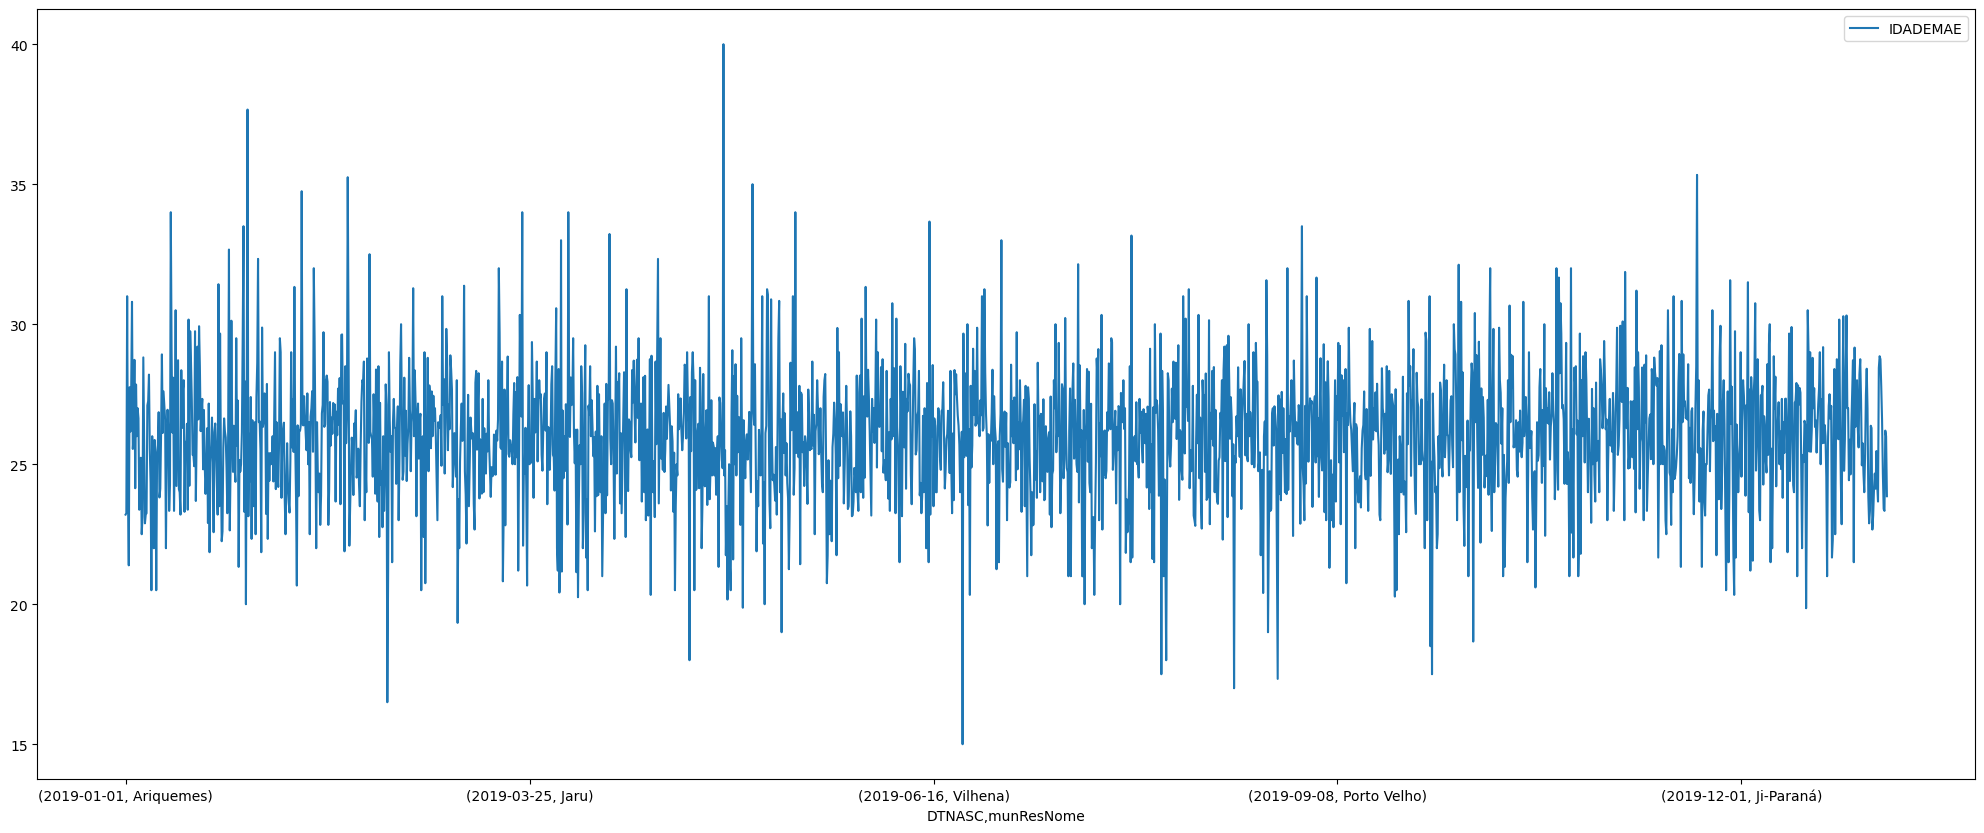

In [151]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_idade = sinasc_raw[['IDADEMAE', 'munResNome', 'DTNASC']]
sinasc_idade = sinasc_idade.set_index('munResNome')
sinasc_idade.pivot_table(
    values='IDADEMAE',
    index=['DTNASC', imediatas]
).plot(figsize=(25,10))

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [155]:
mapping_1 = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M medio",
    "Jaru": "IDH-M medio",
    "Colorado do Oeste": "IDH-M medio",
    "Ouro Preto do Oeste": "IDH-M medio",
    "Espigão D'Oeste": "IDH-M medio",
    "Santa Luzia D'Oeste": "IDH-M medio",
    "Pimenteiras do Oeste": "IDH-M medio",
    "Presidente Médici": "IDH-M medio",
    "Castanheiras": "IDH-M medio",
    "Guajará-Mirim": "IDH-M medio",
    "Chupinguaia": "IDH-M medio",
    "Cabixi": "IDH-M medio",
    "Candeiras do Jamari": "IDH-M medio",
    "São Felipe D'Oeste": "IDH-M medio",
    "Cacaulândia": "IDH-M medio",
    "São Miguel do Guaporé": "IDH-M medio",
    "Mirante da Serra": "IDH-M medio",
    "Alvorada D'Oeste": "IDH-M medio",
    "Teixeirópolis": "IDH-M medio",
    "Nova Brasilândia D'Oeste": "IDH-M medio",
    "Rio Crespo": "IDH-M medio",
    "Primavera de Rondônia": "IDH-M medio",
    "Alta Floresta D'Oeste": "IDH-M medio",
    "Ministro Andreazza": "IDH-M medio",
    "Novo Horizonte de Oeste": "IDH-M medio",
    "Vale do Paraíso": "IDH-M medio",
    "Alto Paraíso": "IDH-M medio",
    "Parecis": "IDH-M medio",
    "Buritis": "IDH-M medio",
    "Itapuã do Oeste": "IDH-M medio",
    "Corumbiara": "IDH-M medio",
    "Cujubim": "IDH-M medio",
    "Costa Marques": "IDH-M medio",
    "São Francisco do Guaporé": "IDH-M medio",
    "Urupá": "IDH-M medio",
    "Monte Negro": "IDH-M medio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre do Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}
sinasc_idade.groupby(mapping_1).count()

,IDADEMAE,DTNASC
munResNome,,
IDH-M alto,16855,16855
IDH-M baixo,1672,1672
IDH-M medio,7911,7911


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [157]:
mapping_2 = {
    "Porto Velho": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Ariquemes": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Castanheiras": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Chupinguaia": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Candeiras do Jamari": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Rio Crespo": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Novo Horizonte de Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Buritis": "Desenvolvimento moderado",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Alto Alegre do Parecis": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular"
}
sinasc_idade.groupby(mapping_2).count()

,IDADEMAE,DTNASC
munResNome,,
Desenvolvimento moderado,21609,21609
Desenvolvimento regular,4829,4829


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [159]:
mapping_3 = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Cerejeiras": "Acima de 500 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Candeiras do Jamari": "Acima de 500 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Novo Horizonte de Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Parecis": "Até 100 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alto Alegre do Parecis": "Acima de 200 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Vale do Anari": "Acima de 100 Milhões"
}
sinasc_idade.groupby(mapping_3).count()

,IDADEMAE,DTNASC
munResNome,,
Acima de 1 Bilhão,17736,17736
Acima de 100 Milhões,1854,1854
Acima de 200 Milhões,570,570
Acima de 300 Milhões,1880,1880
Acima de 500 Milhões,3967,3967
Até 100 Milhões,431,431


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [169]:
### Conclusão:

print("1- Os parametros de altitude recebem um diferença significante entre as operações realizadas.")
print("2- Há um aumento populacional em municipios com area de ate 7000.")
print("3- Não vejo como poderia ser util essa analise com base nos dados coletados.")
print("4- Há um aumento na idedade da mulher entre 2019-03-25, Jaru e 2019-06-16, Vilhena.")
print("5- Dentre as 3 analises feitas existe um serto padrao de desenvolvimento entre os municipios de Rondônia.")

1- Os parametros de altitude recebem um diferença significante entre as operações realizadas.
2- Há um aumento populacional em municipios com area de ate 7000.
3- Não vejo como poderia ser util essa analise com base nos dados coletados.
4- Há um aumento na idedade da mulher entre 2019-03-25, Jaru e 2019-06-16, Vilhena.
5- Dentre as 3 analises feitas existe um serto padrao de desenvolvimento entre os municipios de Rondônia.
